In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.impute import SimpleImputer

In [113]:
df = pd.read_csv('bank.csv')
df_original = pd.read_csv('bank.csv')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [9]:
# Check correlation between all selected columns
selected_columns = ['education', 'job', 'marital', 'age', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']

# Convert categorical columns to numeric using factorize, and then calculate correlation
correlation_matrix = df[selected_columns].apply(lambda x: x.factorize()[0]).corr()
correlation_matrix



,education,job,marital,age,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
education,1.000000,0.226336,-0.038460,0.089016,0.008501,0.016761,0.088135,-0.068010,0.039878,0.008024,0.014184,0.004650,0.023285,-0.015496,-0.015662,-0.009439,-0.012164
job,0.226336,1.000000,-0.015023,0.104184,0.019306,-0.011882,0.101952,-0.053190,0.021981,-0.006907,0.022391,-0.028644,-0.009984,-0.014638,-0.013728,-0.002194,-0.029880
marital,-0.038460,-0.015023,1.000000,-0.022549,0.013950,-0.028302,0.022530,-0.019343,-0.016336,-0.007394,0.000692,-0.043801,-0.035457,0.004472,-0.006329,-0.008716,-0.068325
age,0.089016,0.104184,-0.022549,1.000000,-0.011974,0.024335,0.144435,-0.050349,0.150793,0.004814,0.103314,-0.002673,-0.036110,0.009237,0.036513,0.061671,-0.121012
default,0.008501,0.019306,0.013950,-0.011974,1.000000,0.008113,-0.011076,0.076434,-0.045252,0.001441,-0.038603,-0.020876,0.031447,-0.041202,-0.034170,-0.053619,0.040680
balance,0.016761,-0.011882,-0.028302,0.024335,0.008113,1.000000,-0.032103,-0.002615,-0.015252,0.004135,-0.010458,0.173159,0.007727,-0.007266,-0.008593,-0.046069,0.281372
housing,0.088135,0.101952,0.022530,0.144435,-0.011076,-0.032103,1.000000,-0.076761,0.247982,0.072916,0.238924,0.008469,0.001809,-0.005676,0.005637,0.062070,-0.203888
loan,-0.068010,-0.053190,-0.019343,-0.050349,0.076434,-0.002615,-0.076761,1.000000,-0.020533,0.015214,-0.070157,0.011560,0.036755,-0.016651,-0.031118,-0.069933,0.110580
contact,0.039878,0.021981,-0.016336,0.150793,-0.045252,-0.015252,0.247982,-0.020533,1.000000,0.124734,0.388475,0.040490,-0.008840,0.164696,0.164046,0.223145,-0.212974
day,0.008024,-0.006907,-0.007394,0.004814,0.001441,0.004135,0.072916,0.015214,0.124734,1.000000,0.115517,0.009806,0.061606,0.016496,0.006969,0.021264,-0.045233


# Data Analysis

Attribute types for each feature:

- age: Continuous
- job: Nominal
- marital: Nominal
- education: Nominal
- default: Binary
- balance: Continuous
- housing: Binary
- loan: Binary
- contact: Nominal
- day: Discrete
- month: Nominal
- duration: Continuous
- campaign: Discrete
- pdays: Continuous
- previous: Discrete
- poutcome: Nominal
- deposit: Binary (target variable)


In [9]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [10]:
df.shape

(11162, 17)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [3]:
missing_values = df.isnull().sum()
print(missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [4]:
#checking for duplicated rows
duplicated = df[df.duplicated()]
duplicated

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


No duplicated rows

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [22]:
# Summary of categorical columns
df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


# Data Preprocessing on features 

In [114]:
nominal_categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=nominal_categorical_columns)
# df_encoded = pd.concat([df, pd.get_dummies(df[nominal_categorical_columns])], axis=1)

df = df_encoded

df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,no,2343,yes,no,5,1042,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
1,56,no,45,no,no,5,1467,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
2,41,no,1270,yes,no,5,1389,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
3,55,no,2476,yes,no,5,579,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
4,54,no,184,no,no,5,673,2,-1,0,...,False,False,True,False,False,False,False,False,False,True


In [115]:
all_columns = df.columns.tolist()
all_columns

['age',
 'default',
 'balance',
 'housing',
 'loan',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'deposit',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [116]:
binary_columns = ['default', 'housing', 'loan', 'deposit'] 

# Map 'yes' to 1 and 'no' to 0 for binary columns
for col in binary_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0})

df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1042,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
1,56,0,45,0,0,5,1467,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
2,41,0,1270,1,0,5,1389,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
3,55,0,2476,1,0,5,579,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
4,54,0,184,0,0,5,673,2,-1,0,...,False,False,True,False,False,False,False,False,False,True


In [117]:
df_pre = df

In [92]:
def detect_outliers_iqr_column(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_indices = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)].index
    num_outliers = len(outliers_indices)
    return num_outliers, outliers_indices


In [93]:
def plot_outliers_scatter(data, column_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(data.index, data[column_name])
    plt.title('Scatter plot of {}'.format(column_name))
    plt.xlabel('Index')
    plt.ylabel(column_name)
    plt.show()

Number of outliers in column 'age': 171
Indices of outliers: Index([ 1162,  1236,  1243,  1274,  1320,  1371,  1373,  1380,  1472,  1487,
       ...
        9043,  9281,  9430,  9599,  9773, 10438, 10562, 10570, 10618, 10843],
      dtype='int64', length=171)


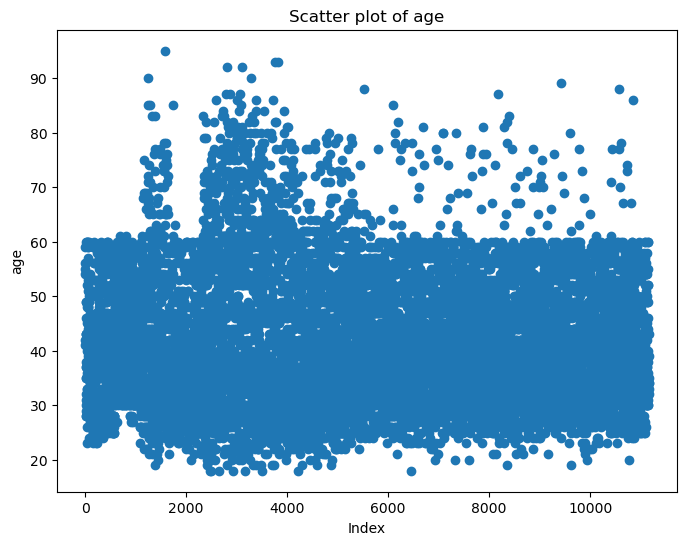

In [50]:
column_name = 'age' 
num_outliers, outliers_indices = detect_outliers_iqr_column(df, column_name)
print("Number of outliers in column '{}': {}".format(column_name, num_outliers))
print("Indices of outliers:", outliers_indices)

plot_outliers_scatter(df, column_name)

Number of outliers in column 'balance': 1055
Indices of outliers: Index([    9,    60,    61,    69,    71,    86,    98,   103,   108,   119,
       ...
       11010, 11013, 11024, 11030, 11055, 11073, 11077, 11085, 11086, 11101],
      dtype='int64', length=1055)


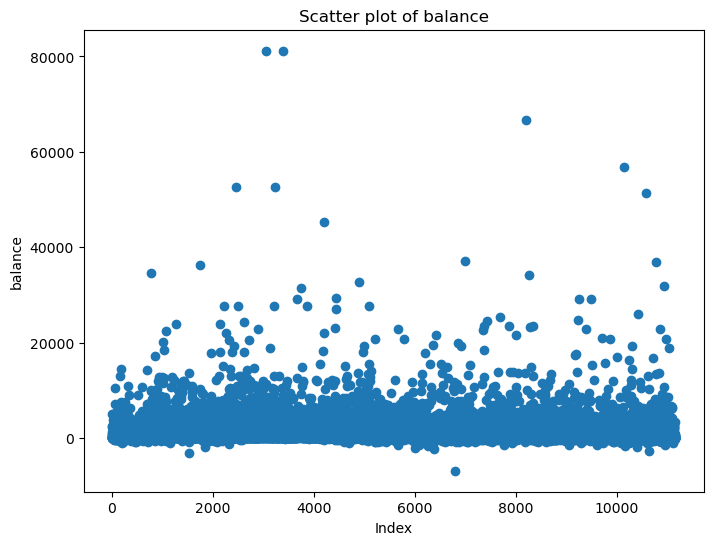

In [51]:
column_name = 'balance' 
num_outliers, outliers_indices = detect_outliers_iqr_column(df, column_name)
print("Number of outliers in column '{}': {}".format(column_name, num_outliers))
print("Indices of outliers:", outliers_indices)

plot_outliers_scatter(df, column_name)

Number of outliers in column 'day': 0
Indices of outliers: Index([], dtype='int64')


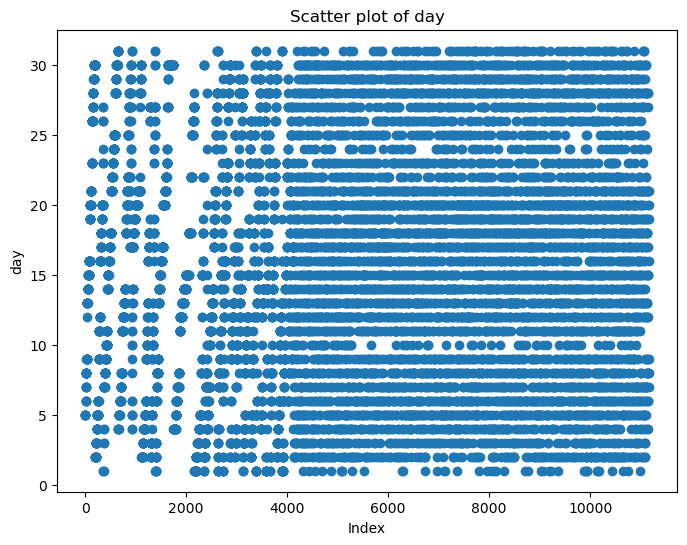

In [52]:
column_name = 'day' 
num_outliers, outliers_indices = detect_outliers_iqr_column(df, column_name)
print("Number of outliers in column '{}': {}".format(column_name, num_outliers))
print("Indices of outliers:", outliers_indices)

plot_outliers_scatter(df, column_name)

Number of outliers in column 'duration': 636
Indices of outliers: Index([    0,     1,     2,     6,     9,    11,    12,    13,    15,    17,
       ...
       10335, 10343, 10401, 10541, 10619, 10647, 10788, 10798, 10802, 11008],
      dtype='int64', length=636)


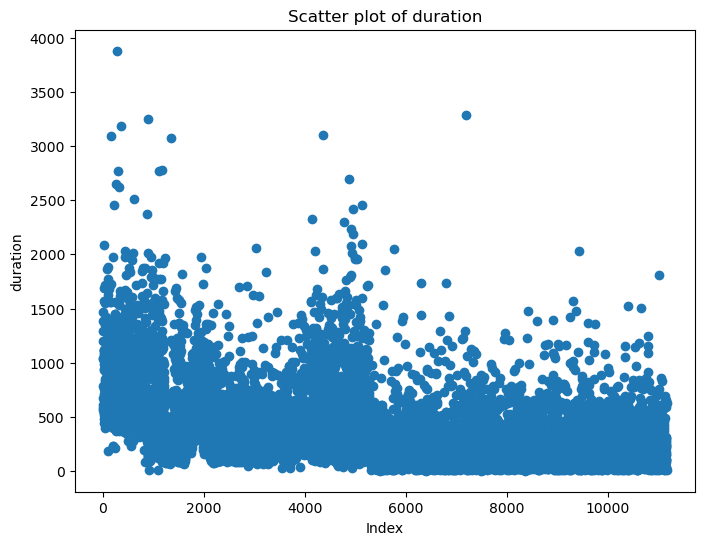

In [53]:
column_name = 'duration' 
num_outliers, outliers_indices = detect_outliers_iqr_column(df, column_name)
print("Number of outliers in column '{}': {}".format(column_name, num_outliers))
print("Indices of outliers:", outliers_indices)

plot_outliers_scatter(df, column_name)

Number of outliers in column 'campaign': 601
Indices of outliers: Index([  125,   135,   163,   186,   187,   196,   197,   212,   217,   224,
       ...
       10960, 10977, 10993, 11032, 11039, 11057, 11074, 11086, 11139, 11140],
      dtype='int64', length=601)


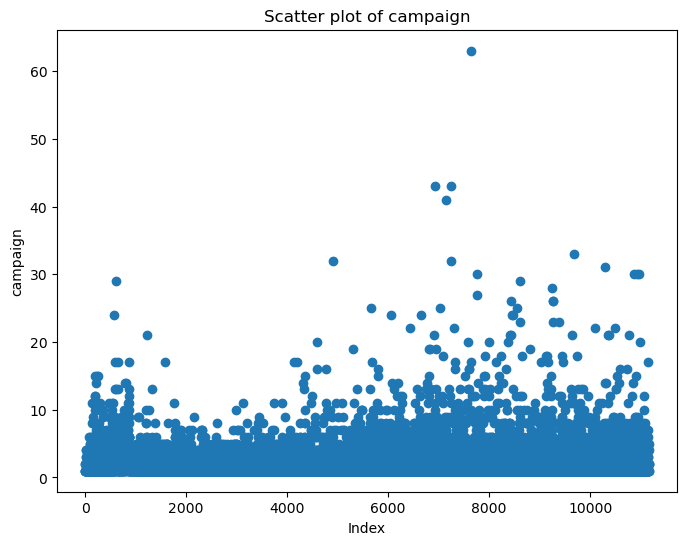

In [54]:
column_name = 'campaign' 
num_outliers, outliers_indices = detect_outliers_iqr_column(df, column_name)
print("Number of outliers in column '{}': {}".format(column_name, num_outliers))
print("Indices of outliers:", outliers_indices)

plot_outliers_scatter(df, column_name)

Number of outliers in column 'pdays': 2750
Indices of outliers: Index([  890,   891,   899,   933,   951,   952,   953,   961,   968,   977,
       ...
       11087, 11088, 11092, 11098, 11104, 11125, 11133, 11145, 11155, 11160],
      dtype='int64', length=2750)


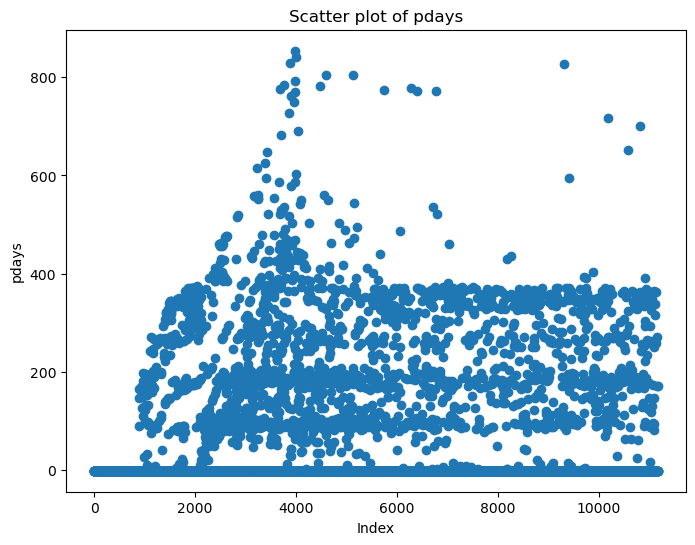

In [55]:
column_name = 'pdays' 
num_outliers, outliers_indices = detect_outliers_iqr_column(df, column_name)
print("Number of outliers in column '{}': {}".format(column_name, num_outliers))
print("Indices of outliers:", outliers_indices)

plot_outliers_scatter(df, column_name)

Number of outliers in column 'previous': 1258
Indices of outliers: Index([  891,   933,   952,   968,  1007,  1035,  1062,  1133,  1138,  1145,
       ...
       11017, 11024, 11039, 11054, 11080, 11092, 11125, 11133, 11145, 11160],
      dtype='int64', length=1258)


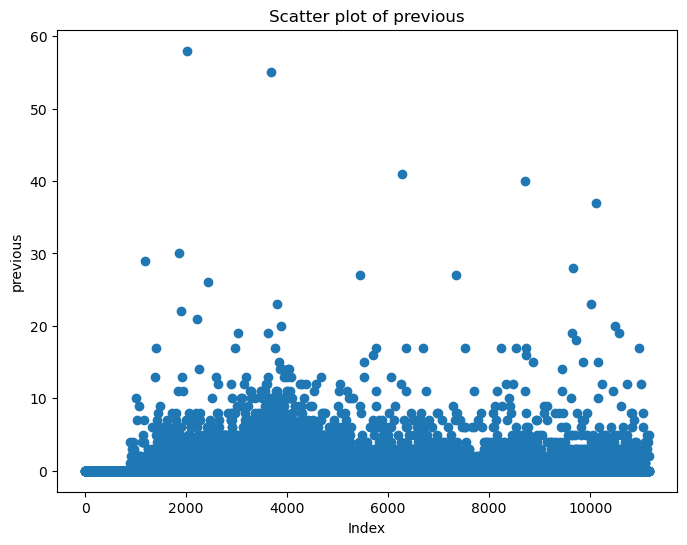

In [56]:
column_name = 'previous' 
num_outliers, outliers_indices = detect_outliers_iqr_column(df, column_name)
print("Number of outliers in column '{}': {}".format(column_name, num_outliers))
print("Indices of outliers:", outliers_indices)

plot_outliers_scatter(df, column_name)

In [57]:
def remove_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    return filtered_data


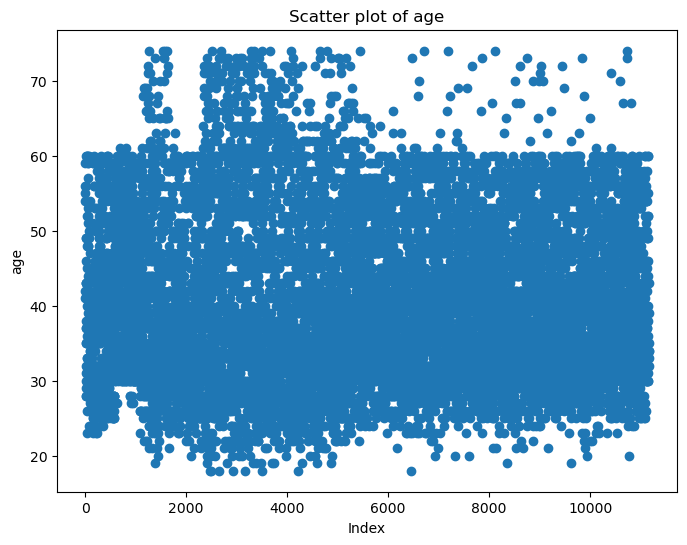

In [94]:
column_name = 'age' 
df = remove_outliers_iqr(df, column_name)
plot_outliers_scatter(df, column_name)

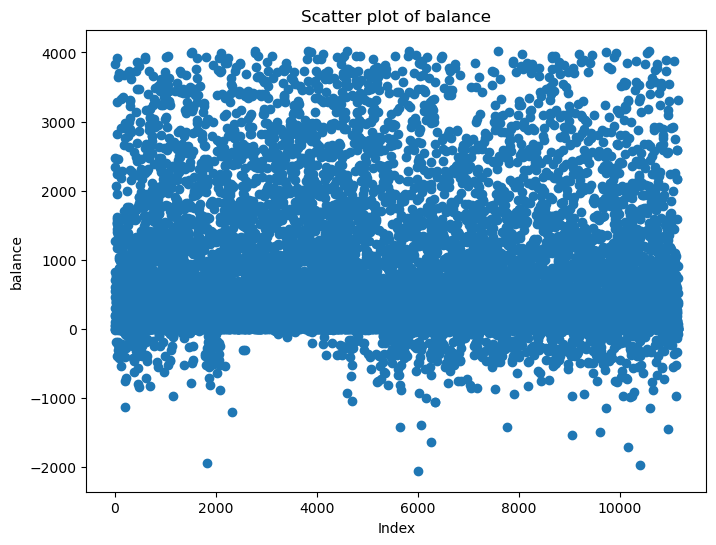

In [95]:
column_name = 'balance' 
df = remove_outliers_iqr(df, column_name)
plot_outliers_scatter(df, column_name)

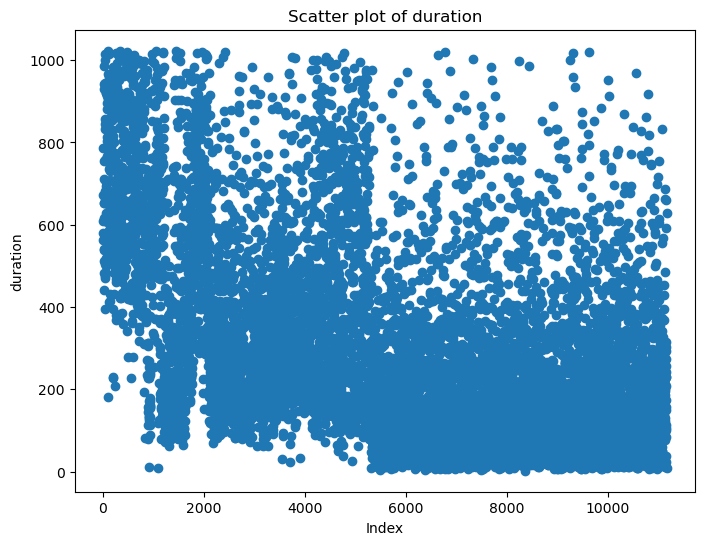

In [96]:
column_name = 'duration' 
df = remove_outliers_iqr(df, column_name)
plot_outliers_scatter(df, column_name)

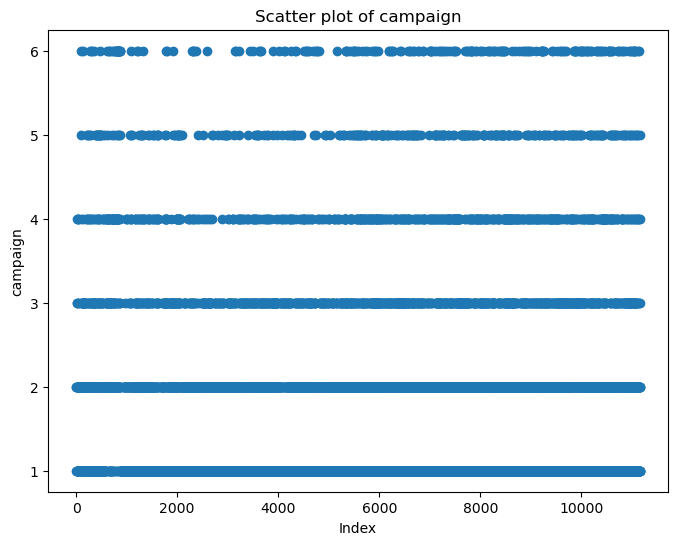

In [97]:
column_name = 'campaign' 
df = remove_outliers_iqr(df, column_name)
plot_outliers_scatter(df, column_name)

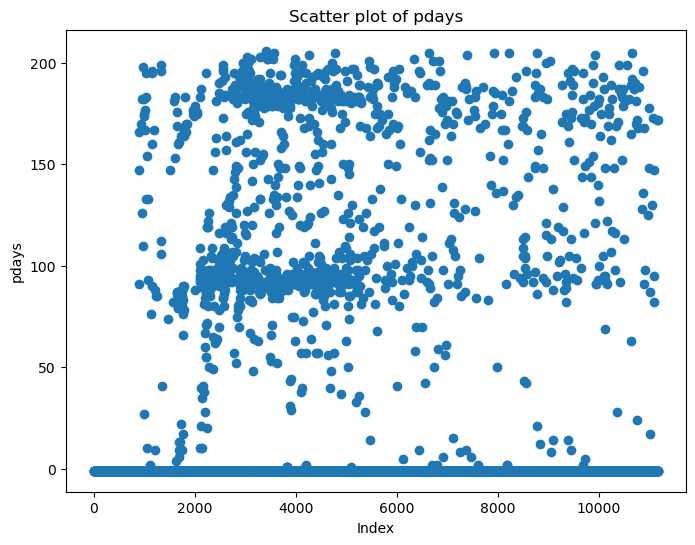

In [98]:
column_name = 'pdays' 
df = remove_outliers_iqr(df, column_name)
plot_outliers_scatter(df, column_name)

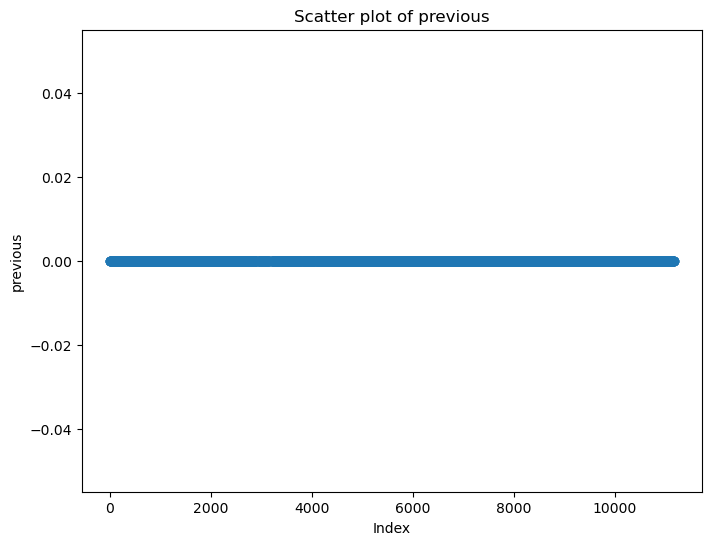

In [99]:
column_name = 'previous' 
df = remove_outliers_iqr(df, column_name)
plot_outliers_scatter(df, column_name)

In [64]:
def detect_outliers_zscore(data, column_name, threshold=3):
    z_scores = np.abs((data[column_name] - data[column_name].mean()) / data[column_name].std())
    outliers_indices = np.where(z_scores > threshold)[0]
    num_outliers = len(outliers_indices)
    return num_outliers, outliers_indices

def remove_outliers_zscore(data, column_name, threshold=3):
    z_scores = np.abs((data[column_name] - data[column_name].mean()) / data[column_name].std())
    outliers_indices = np.where(z_scores > threshold)[0]
    data_no_outliers = data.drop(outliers_indices)
    return data_no_outliers

Number of outliers in column 'age': 132
Indices of outliers: [ 1236  1243  1274  1320  1373  1380  1472  1558  1582  1591  1731  2340
  2356  2382  2397  2543  2544  2598  2665  2709  2717  2722  2754  2765
  2782  2793  2802  2808  2809  2820  2825  2857  2865  2922  2925  2932
  2960  3001  3002  3004  3014  3021  3043  3067  3087  3088  3098  3099
  3101  3116  3130  3144  3156  3194  3249  3255  3267  3292  3311  3333
  3339  3375  3380  3381  3446  3484  3486  3500  3504  3539  3546  3596
  3686  3706  3716  3756  3765  3775  3786  3822  3873  3941  3945  3979
  3989  4013  4068  4080  4144  4375  4435  4550  4560  4767  4781  4824
  4956  5014  5213  5258  5284  5521  5799  6096  6140  6142  6193  6249
  6325  6478  6691  6940  7084  7088  7352  7632  7882  8167  8297  8355
  8360  8392  8457  8873  9430  9599  9773 10438 10562 10570 10618 10843]


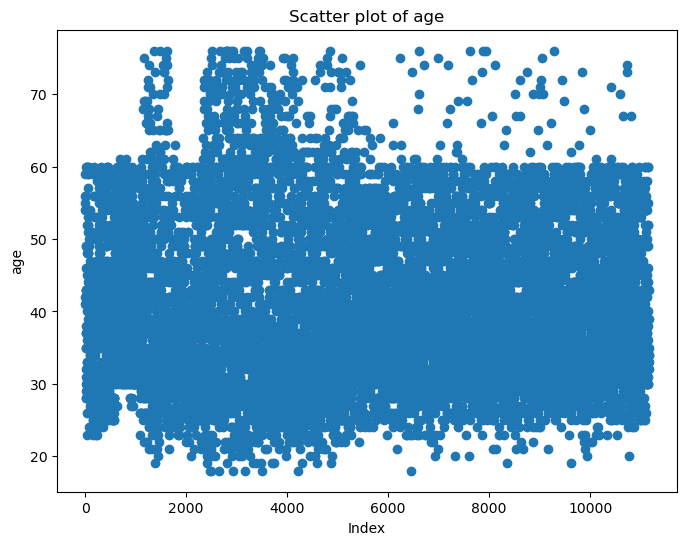

In [65]:
column_name = 'age' 
threshold = 3 

# Detect outliers
num_outliers, outliers_indices = detect_outliers_zscore(df_original, column_name, threshold)
print("Number of outliers in column '{}': {}".format(column_name, num_outliers))
print("Indices of outliers:", outliers_indices)

# Remove outliers
df_no_outliers = remove_outliers_zscore(df_original, column_name, threshold)

plot_outliers_scatter(df_no_outliers, column_name)

Number of outliers in column 'balance': 173
Indices of outliers: [  170   185   692   771   861   906   926   967   989  1006  1010  1036
  1039  1073  1198  1236  1239  1271  1372  1409  1425  1522  1744  1960
  2072  2120  2132  2139  2208  2226  2258  2323  2331  2362  2383  2421
  2468  2495  2518  2550  2570  2597  2614  2624  2670  2671  2714  2742
  2815  2900  2988  3043  3047  3123  3211  3213  3236  3302  3380  3468
  3663  3664  3741  3760  3787  3794  3870  4034  4067  4122  4191  4207
  4210  4274  4350  4412  4421  4435  4438  4621  4635  4655  4865  4901
  4922  4959  4969  4993  5071  5092  5095  5105  5114  5135  5205  5598
  5663  5792  5942  6135  6144  6207  6292  6361  6423  6522  6547  6548
  6638  6662  6766  6833  6863  6920  6994  7048  7094  7337  7340  7361
  7372  7377  7421  7654  7680  7857  7891  7946  7997  8042  8174  8208
  8257  8278  8303  8333  8335  8512  8680  8695  9046  9179  9186  9219
  9230  9242  9392  9485  9518  9550  9715  9764  9869  993

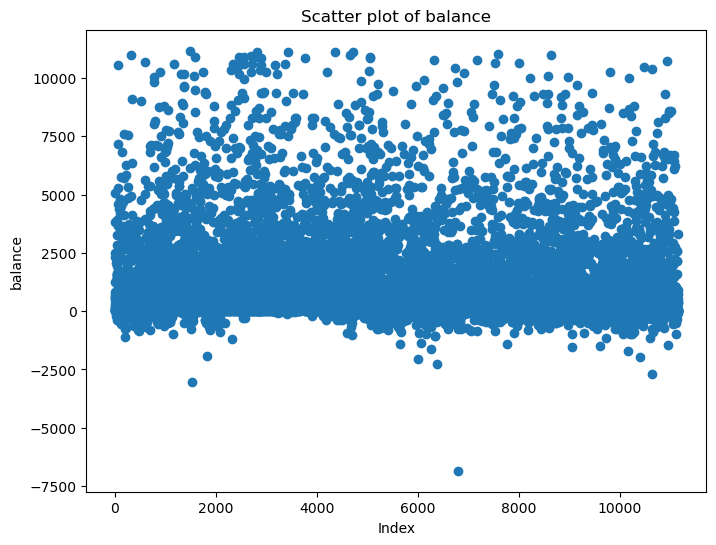

In [66]:
column_name = 'balance' 
threshold = 3 

# Detect outliers
num_outliers, outliers_indices = detect_outliers_zscore(df_original, column_name, threshold)
print("Number of outliers in column '{}': {}".format(column_name, num_outliers))
print("Indices of outliers:", outliers_indices)

# Remove outliers
df_no_outliers = remove_outliers_zscore(df_original, column_name, threshold)

plot_outliers_scatter(df_no_outliers, column_name)

By only checking ouliers of two features by Z-Score, it shows that IQR was a good option.

# Data Visualization

In [100]:
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
3,55,0,2476,1,0,5,579,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
4,54,0,184,0,0,5,673,2,-1,0,...,False,False,True,False,False,False,False,False,False,True
5,42,0,0,1,1,5,562,2,-1,0,...,False,False,True,False,False,False,False,False,False,True
8,37,0,1,1,0,6,608,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
10,38,0,100,1,0,7,786,1,-1,0,...,False,False,True,False,False,False,False,False,False,True


In [101]:
df_original.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Before Preprocessing

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

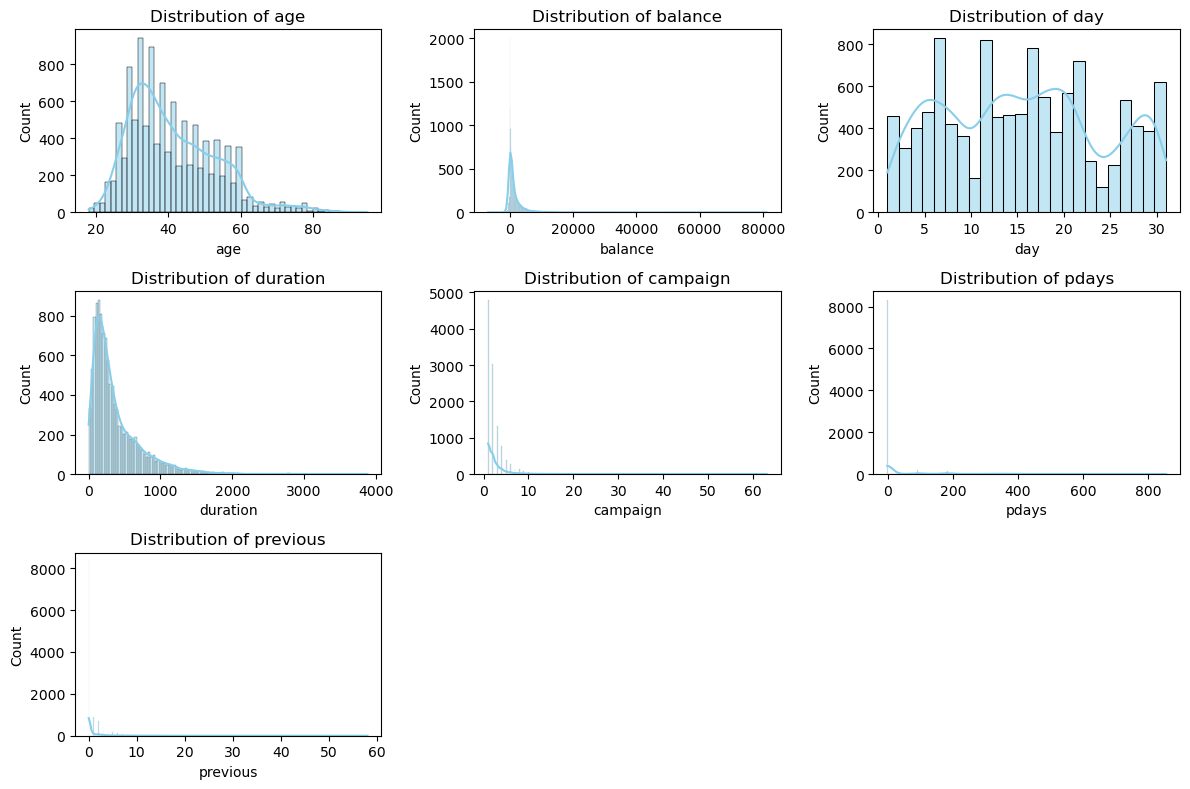

In [69]:
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Distribution plots (Histograms)
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_original[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

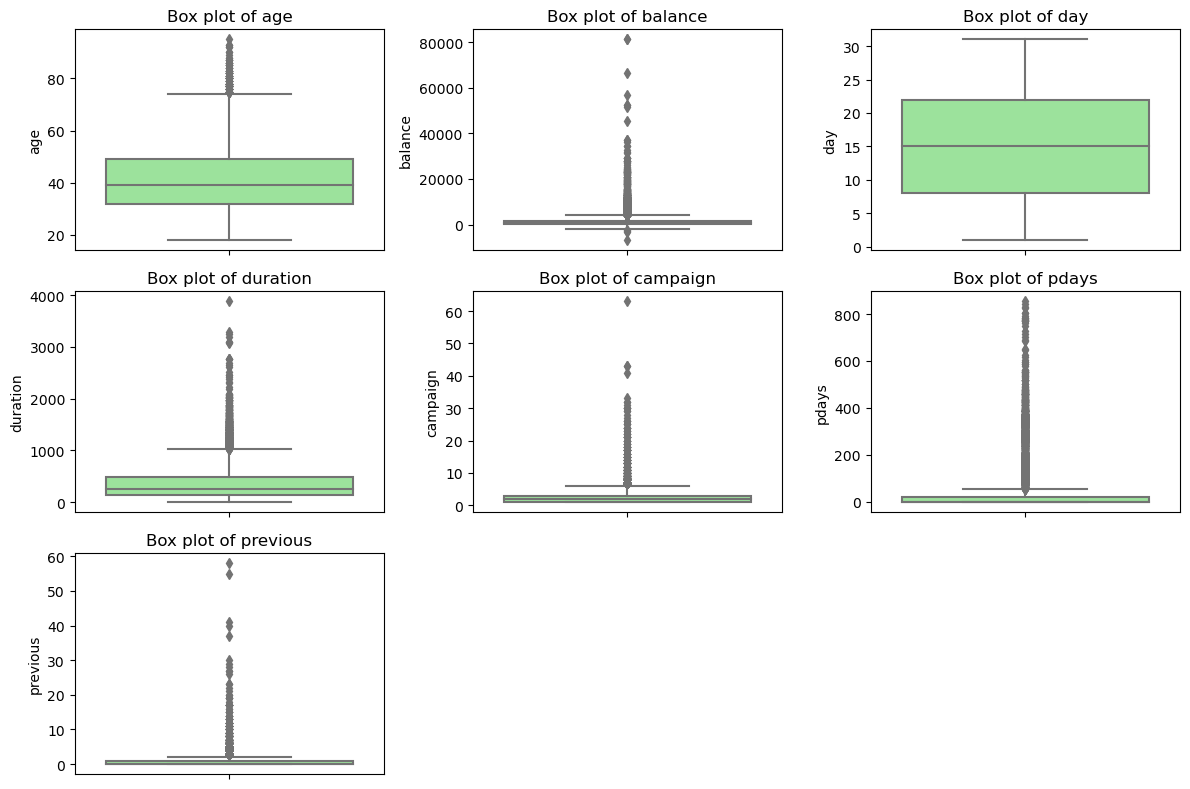

In [70]:
# Box plots
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_original[column], color='lightgreen')
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

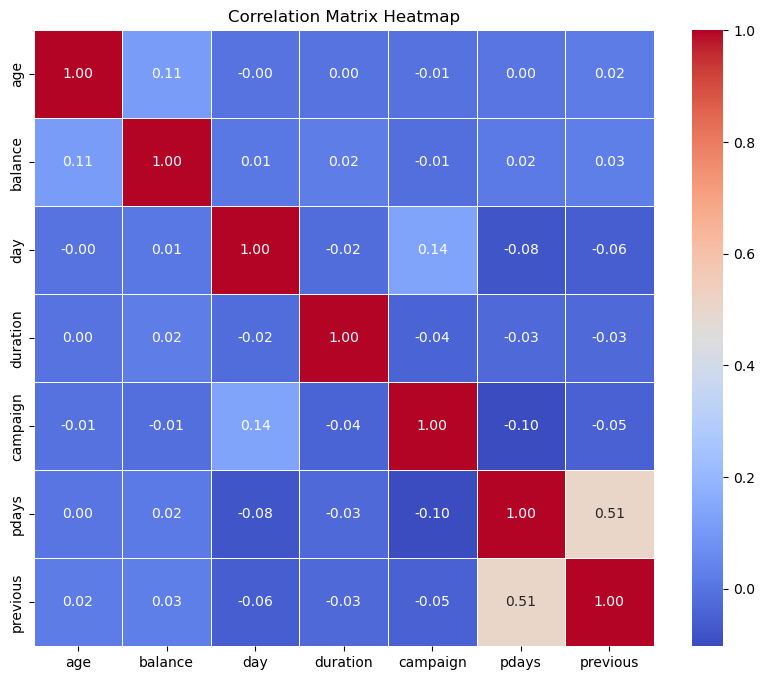

In [71]:
# Correlation matrix heatmap
correlation_matrix = df_original[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [102]:
df_cleaned = df

In [103]:
df_cleaned.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
3,55,0,2476,1,0,5,579,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
4,54,0,184,0,0,5,673,2,-1,0,...,False,False,True,False,False,False,False,False,False,True
5,42,0,0,1,1,5,562,2,-1,0,...,False,False,True,False,False,False,False,False,False,True
8,37,0,1,1,0,6,608,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
10,38,0,100,1,0,7,786,1,-1,0,...,False,False,True,False,False,False,False,False,False,True


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

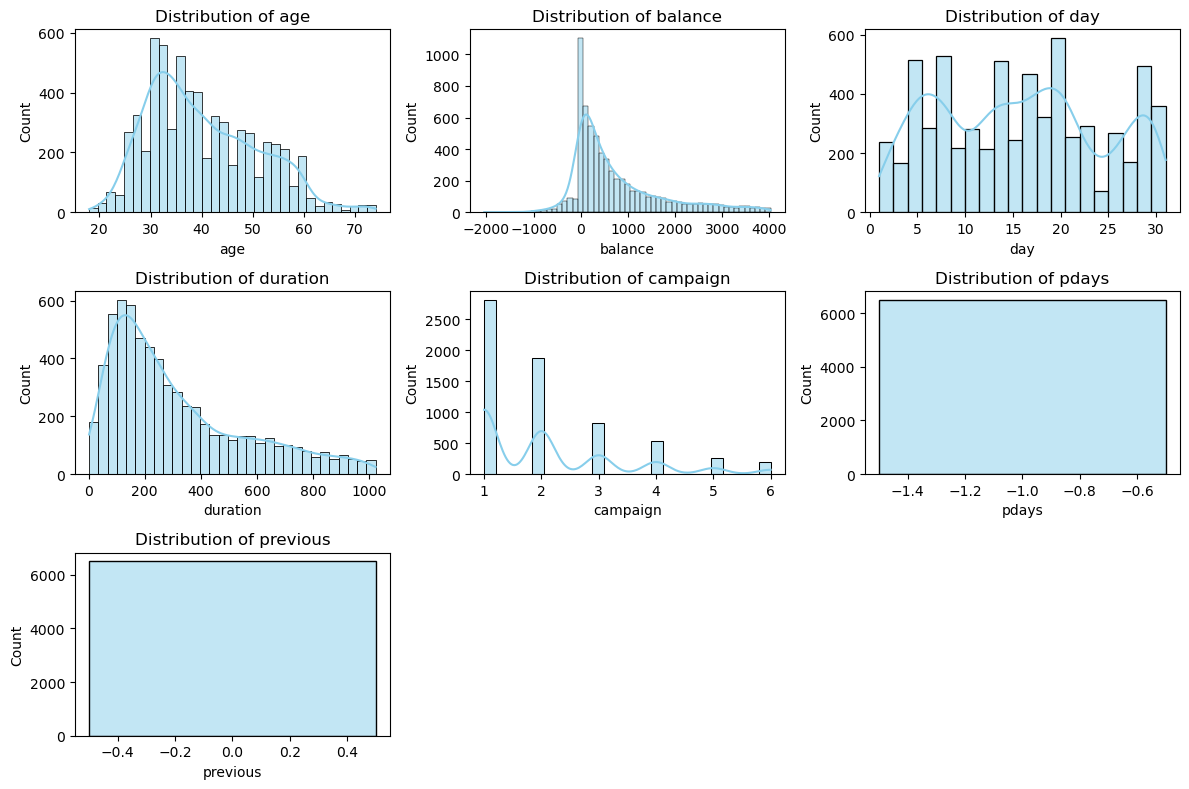

In [74]:
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Distribution plots (Histograms)
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_cleaned[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

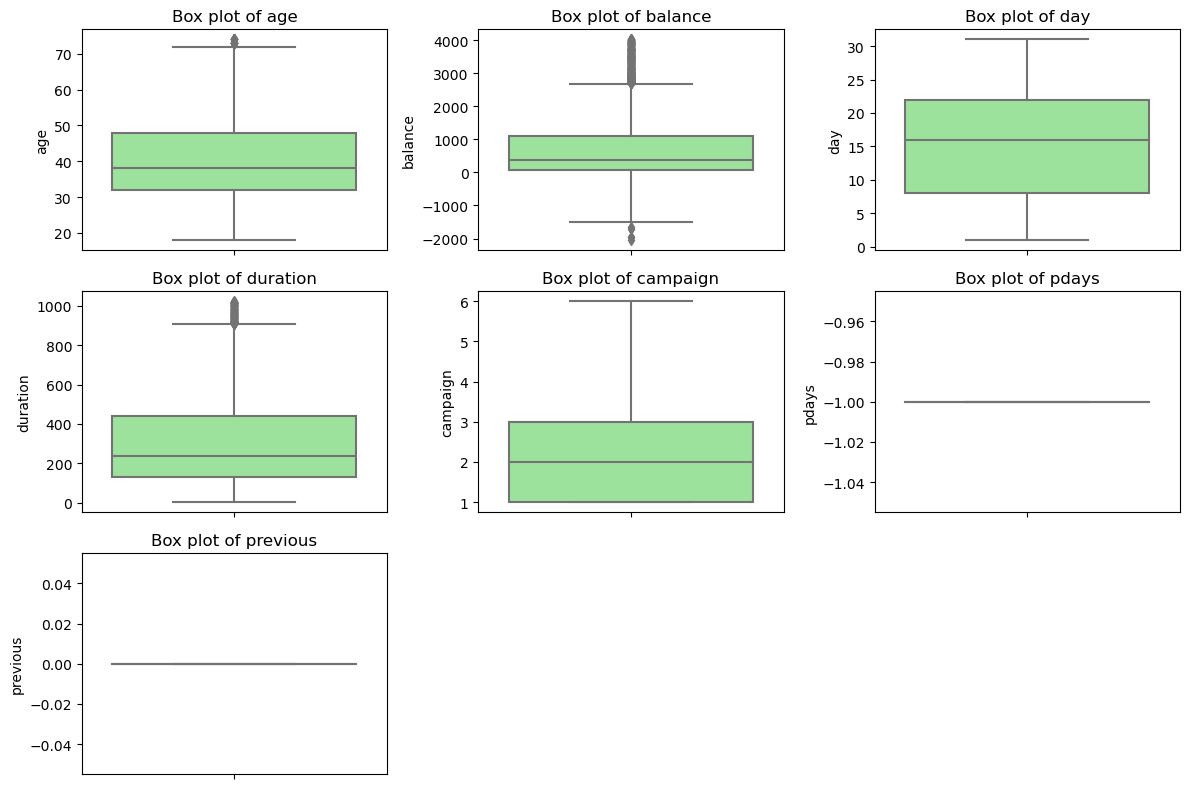

In [75]:
# Box plots
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_cleaned[column], color='lightgreen')
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

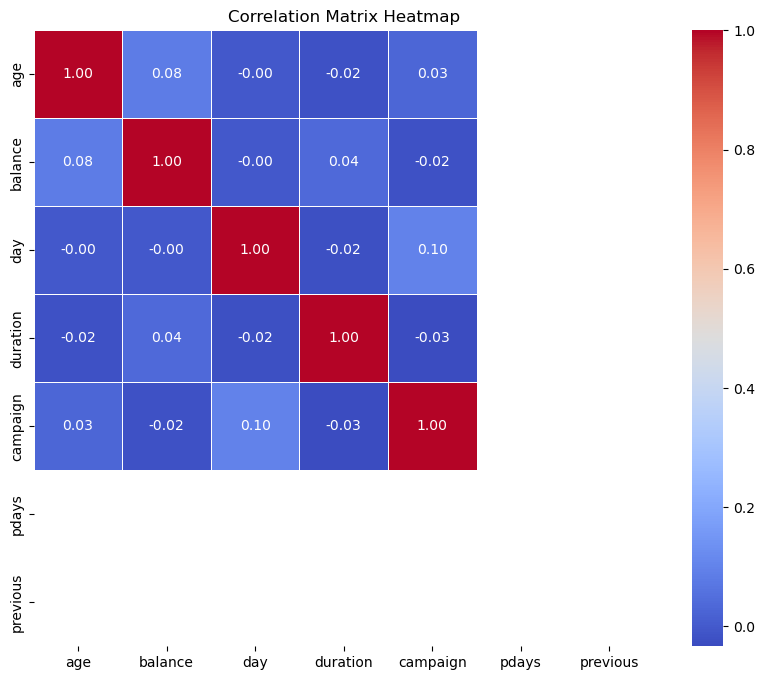

In [76]:
# Correlation matrix heatmap
correlation_matrix = df_cleaned[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

We can see after preprocessing we have normalized all features

In [104]:
df_cleaned.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
3,55,0,2476,1,0,5,579,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
4,54,0,184,0,0,5,673,2,-1,0,...,False,False,True,False,False,False,False,False,False,True
5,42,0,0,1,1,5,562,2,-1,0,...,False,False,True,False,False,False,False,False,False,True
8,37,0,1,1,0,6,608,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
10,38,0,100,1,0,7,786,1,-1,0,...,False,False,True,False,False,False,False,False,False,True


# Data Transformation

In [105]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Copying the dataframe to avoid modifying the original dataframe
df_normalized = df_cleaned.copy()
df_standardized = df_cleaned.copy()

# Selecting numerical columns for normalization and standardization
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Normalization using Min-Max scaling
scaler = MinMaxScaler()
df_normalized[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

# Standardization using Z-score scaling
scaler = StandardScaler()
df_standardized[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])


In [107]:
print("Normalized Data:")
df_normalized.head()

Normalized Data:


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
3,0.660714,0,0.744979,1,0,0.133333,0.565132,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,True
4,0.642857,0,0.367633,0,0,0.133333,0.657199,0.2,0.0,0.0,...,False,False,True,False,False,False,False,False,False,True
5,0.428571,0,0.337339,1,1,0.133333,0.548482,0.2,0.0,0.0,...,False,False,True,False,False,False,False,False,False,True
8,0.339286,0,0.337504,1,0,0.166667,0.593536,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,True
10,0.357143,0,0.353803,1,0,0.200000,0.767875,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,True


In [108]:
print("\nStandardized Data:")
df_standardized.head()


Standardized Data:


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
3,1.373684,0,1.770232,1,0,-1.272166,1.098714,-0.836848,0.0,0.0,...,False,False,True,False,False,False,False,False,False,True
4,1.280726,0,-0.579933,0,0,-1.272166,1.487774,-0.069767,0.0,0.0,...,False,False,True,False,False,False,False,False,False,True
5,0.165230,0,-0.768602,1,1,-1.272166,1.028352,-0.069767,0.0,0.0,...,False,False,True,False,False,False,False,False,False,True
8,-0.299560,0,-0.767577,1,0,-1.153787,1.218743,-0.836848,0.0,0.0,...,False,False,True,False,False,False,False,False,False,True
10,-0.206602,0,-0.666065,1,0,-1.035408,1.955474,-0.836848,0.0,0.0,...,False,False,True,False,False,False,False,False,False,True


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

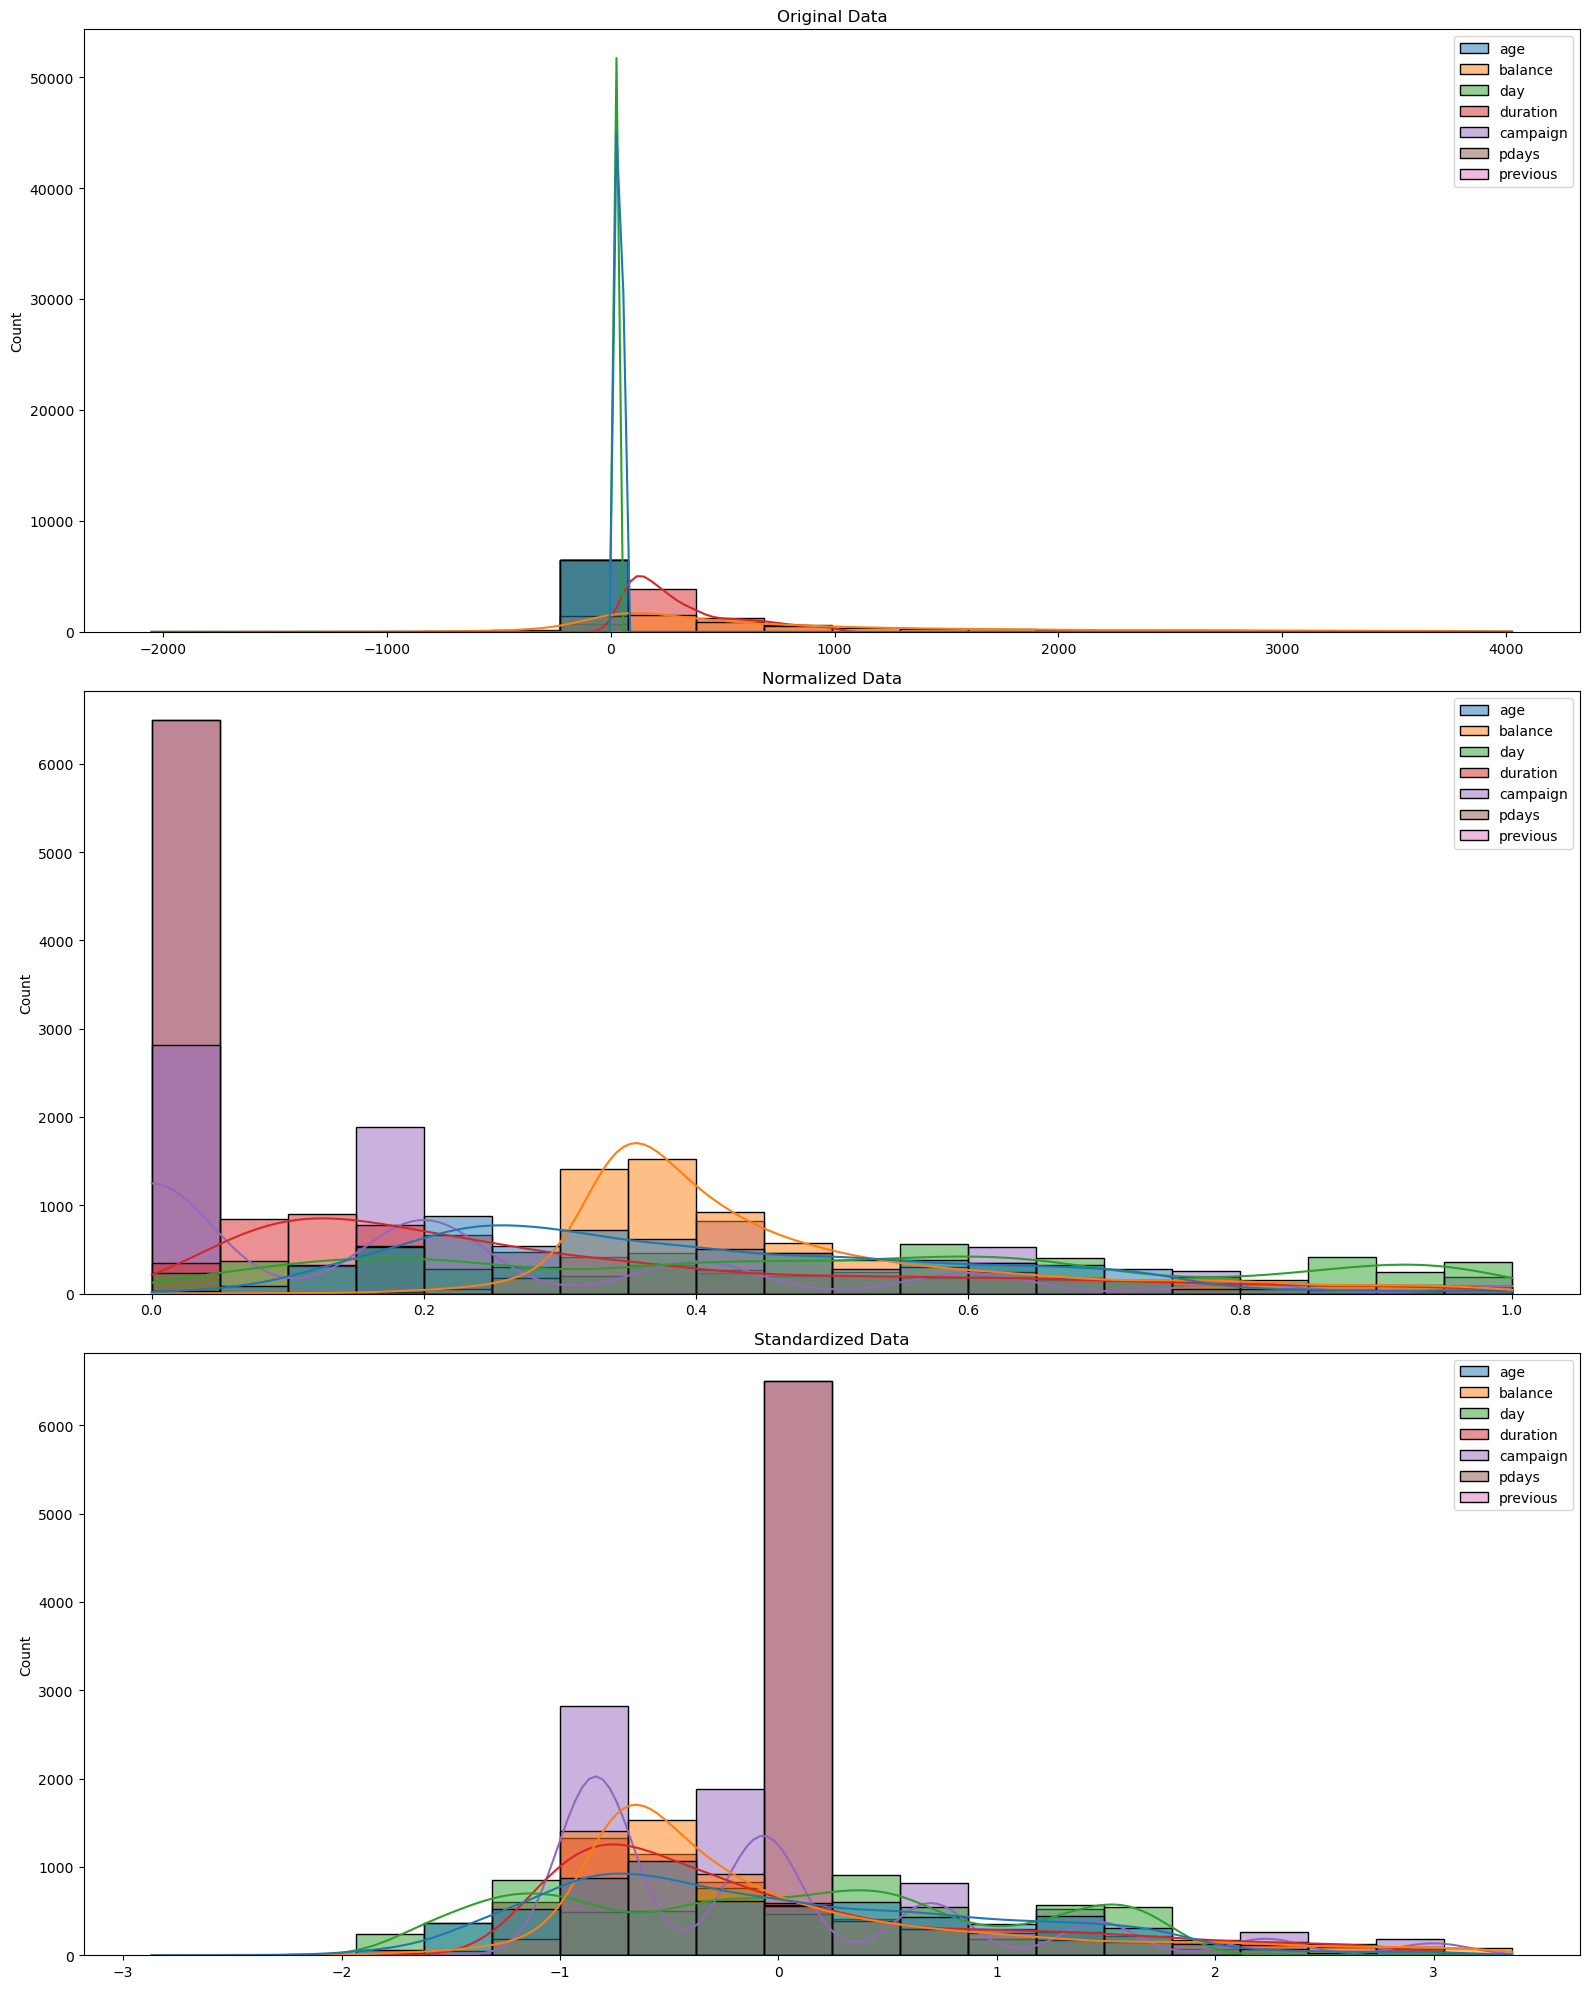

In [109]:
plt.figure(figsize=(16, 20))  # Keep the figure size

# Original Data
plt.subplot(3, 1, 1)
sns.histplot(data=df_cleaned[numerical_cols], kde=True, bins=20)  # Increase bins
plt.title('Original Data')

# Normalization
plt.subplot(3, 1, 2)
sns.histplot(data=df_normalized[numerical_cols], kde=True, bins=20)  # Increase bins
plt.title('Normalized Data')

# Standardization
plt.subplot(3, 1, 3)
sns.histplot(data=df_standardized[numerical_cols], kde=True, bins=20)  # Increase bins
plt.title('Standardized Data')


plt.tight_layout()
plt.show()


# Classification

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [118]:
df_pre.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1042,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
1,56,0,45,0,0,5,1467,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
2,41,0,1270,1,0,5,1389,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
3,55,0,2476,1,0,5,579,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
4,54,0,184,0,0,5,673,2,-1,0,...,False,False,True,False,False,False,False,False,False,True


In [119]:
# Convert dataframe to numpy array
X = df_pre.drop(columns=['deposit']).values  # Features
y = df_pre['deposit'].values  # Target variable

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}

# Training and evaluating each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: Accuracy = {accuracy:.2f}')
    
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion matrix for {name}:')
    print(cm)
    print(classification_report(y_test, y_pred))
    print("\n")


KNN: Accuracy = 0.75
Confusion matrix for KNN:
[[896 270]
 [295 772]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1166
           1       0.74      0.72      0.73      1067

    accuracy                           0.75      2233
   macro avg       0.75      0.75      0.75      2233
weighted avg       0.75      0.75      0.75      2233



SVM: Accuracy = 0.73
Confusion matrix for SVM:
[[939 227]
 [383 684]]
              precision    recall  f1-score   support

           0       0.71      0.81      0.75      1166
           1       0.75      0.64      0.69      1067

    accuracy                           0.73      2233
   macro avg       0.73      0.72      0.72      2233
weighted avg       0.73      0.73      0.72      2233



Naive Bayes: Accuracy = 0.74
Confusion matrix for Naive Bayes:
[[998 168]
 [413 654]]
              precision    recall  f1-score   support

           0       0.71      0.86      0.77      1166
       

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.75
Confusion matrix for Logistic Regression:
[[958 208]
 [360 707]]
              precision    recall  f1-score   support

           0       0.73      0.82      0.77      1166
           1       0.77      0.66      0.71      1067

    accuracy                           0.75      2233
   macro avg       0.75      0.74      0.74      2233
weighted avg       0.75      0.75      0.74      2233



Decision Tree: Accuracy = 0.78
Confusion matrix for Decision Tree:
[[929 237]
 [261 806]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1166
           1       0.77      0.76      0.76      1067

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233





In [120]:
# Convert dataframe to numpy array
X = df_cleaned.drop(columns=['deposit']).values  # Features
y = df_cleaned['deposit'].values  # Target variable

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}

# Training and evaluating each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: Accuracy = {accuracy:.2f}')
    
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion matrix for {name}:')
    print(cm)
    print(classification_report(y_test, y_pred))
    print("\n")

KNN: Accuracy = 0.75
Confusion matrix for KNN:
[[671 139]
 [192 298]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       810
           1       0.68      0.61      0.64       490

    accuracy                           0.75      1300
   macro avg       0.73      0.72      0.72      1300
weighted avg       0.74      0.75      0.74      1300



SVM: Accuracy = 0.76
Confusion matrix for SVM:
[[733  77]
 [238 252]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       810
           1       0.77      0.51      0.62       490

    accuracy                           0.76      1300
   macro avg       0.76      0.71      0.72      1300
weighted avg       0.76      0.76      0.74      1300



Naive Bayes: Accuracy = 0.73
Confusion matrix for Naive Bayes:
[[722  88]
 [261 229]]
              precision    recall  f1-score   support

           0       0.73      0.89      0.81       810
       

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [121]:
# Convert dataframe to numpy array
X = df_standardized.drop(columns=['deposit']).values  # Features
y = df_standardized['deposit'].values  # Target variable

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}

# Training and evaluating each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: Accuracy = {accuracy:.2f}')
    
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion matrix for {name}:')
    print(cm)
    print(classification_report(y_test, y_pred))
    print("\n")

KNN: Accuracy = 0.81
Confusion matrix for KNN:
[[725  85]
 [156 334]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       810
           1       0.80      0.68      0.73       490

    accuracy                           0.81      1300
   macro avg       0.81      0.79      0.80      1300
weighted avg       0.81      0.81      0.81      1300



SVM: Accuracy = 0.86
Confusion matrix for SVM:
[[717  93]
 [ 86 404]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       810
           1       0.81      0.82      0.82       490

    accuracy                           0.86      1300
   macro avg       0.85      0.85      0.85      1300
weighted avg       0.86      0.86      0.86      1300



Naive Bayes: Accuracy = 0.73
Confusion matrix for Naive Bayes:
[[730  80]
 [268 222]]
              precision    recall  f1-score   support

           0       0.73      0.90      0.81       810
       

In [122]:
# Convert dataframe to numpy array
X = df_normalized.drop(columns=['deposit']).values  # Features
y = df_normalized['deposit'].values  # Target variable

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}

# Training and evaluating each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: Accuracy = {accuracy:.2f}')
    
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion matrix for {name}:')
    print(cm)
    print(classification_report(y_test, y_pred))
    print("\n")

KNN: Accuracy = 0.76
Confusion matrix for KNN:
[[709 101]
 [216 274]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       810
           1       0.73      0.56      0.63       490

    accuracy                           0.76      1300
   macro avg       0.75      0.72      0.73      1300
weighted avg       0.75      0.76      0.75      1300



SVM: Accuracy = 0.84
Confusion matrix for SVM:
[[714  96]
 [109 381]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       810
           1       0.80      0.78      0.79       490

    accuracy                           0.84      1300
   macro avg       0.83      0.83      0.83      1300
weighted avg       0.84      0.84      0.84      1300



Naive Bayes: Accuracy = 0.73
Confusion matrix for Naive Bayes:
[[730  80]
 [268 222]]
              precision    recall  f1-score   support

           0       0.73      0.90      0.81       810
       

# Classifier Performance Report

## Introduction
In this report, we evaluate the performance of five classifiers: KNN, SVM, Naive Bayes, Logistic Regression, and Decision Tree, on a dataset after preprocessing through various methods. We analyze the accuracy and precision-recall metrics for each classifier after each preprocessing step.

## Preprocessing Steps
- One-Hot Encoding
- Removing Outliers (Cleaning)
- Normalizing
- Standardizing

## Results

### After One-Hot Encoding:

- KNN: Accuracy = 0.75, Precision = 0.74 (class 0) / 0.75 (class 1)
- SVM: Accuracy = 0.73, Precision = 0.71 (class 0) / 0.75 (class 1)
- Naive Bayes: Accuracy = 0.74, Precision = 0.71 (class 0) / 0.80 (class 1)
- Logistic Regression: Accuracy = 0.75, Precision = 0.73 (class 0) / 0.77 (class 1)
- Decision Tree: Accuracy = 0.78, Precision = 0.78 (class 0) / 0.77 (class 1)

### After Removing Outliers (Cleaning):

- KNN: Accuracy = 0.75, Precision = 0.78 (class 0) / 0.68 (class 1)
- SVM: Accuracy = 0.76, Precision = 0.75 (class 0) / 0.77 (class 1)
- Naive Bayes: Accuracy = 0.73, Precision = 0.73 (class 0) / 0.72 (class 1)
- Logistic Regression: Accuracy = 0.82, Precision = 0.84 (class 0) / 0.78 (class 1)
- Decision Tree: Accuracy = 0.79, Precision = 0.83 (class 0) / 0.73 (class 1)

### After Normalizing:

- KNN: Accuracy = 0.76, Precision = 0.77 (class 0) / 0.73 (class 1)
- SVM: Accuracy = 0.84, Precision = 0.87 (class 0) / 0.80 (class 1)
- Naive Bayes: Accuracy = 0.73, Precision = 0.73 (class 0) / 0.74 (class 1)
- Logistic Regression: Accuracy = 0.84, Precision = 0.86 (class 0) / 0.80 (class 1)
- Decision Tree: Accuracy = 0.79, Precision = 0.83 (class 0) / 0.73 (class 1)

### After Standardizing:

- KNN: Accuracy = 0.81, Precision = 0.82 (class 0) / 0.80 (class 1)
- SVM: Accuracy = 0.86, Precision = 0.89 (class 0) / 0.81 (class 1)
- Naive Bayes: Accuracy = 0.73, Precision = 0.73 (class 0) / 0.74 (class 1)
- Logistic Regression: Accuracy = 0.84, Precision = 0.86 (class 0) / 0.80 (class 1)
- Decision Tree: Accuracy = 0.79, Precision = 0.83 (class 0) / 0.73 (class 1)

## Conclusion
After standardizing the data, SVM achieved the highest accuracy of 0.86 and precision for both classes, making it the best-performing classifier for this dataset. SVM outperformed other classifiers consistently across various preprocessing steps.
